In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('heart.csv')

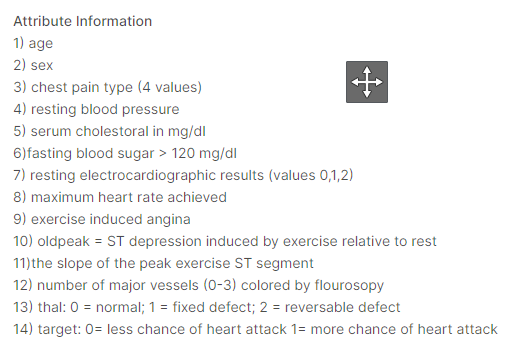

In [3]:
dataset.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [4]:
dataset.describe()

age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]

In [5]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

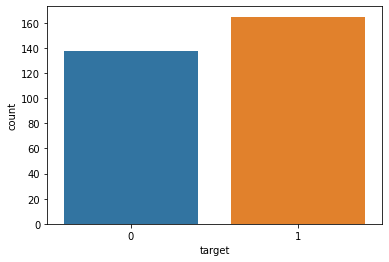

In [6]:
sns.countplot(x = 'target' , data=dataset)

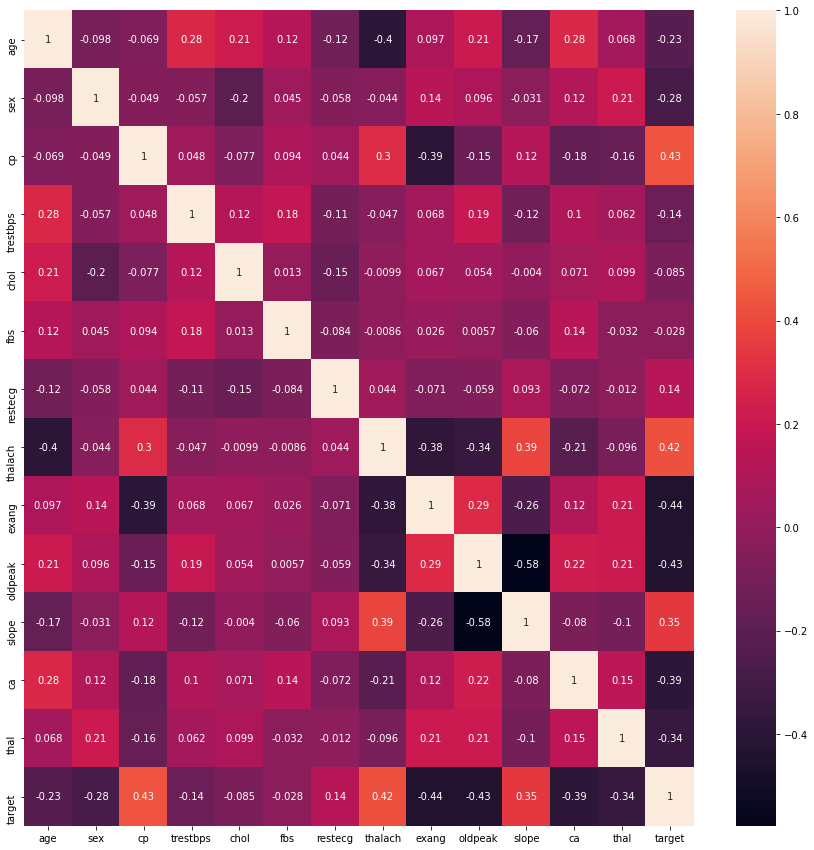

In [7]:
corr_mat = dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat , annot=True)

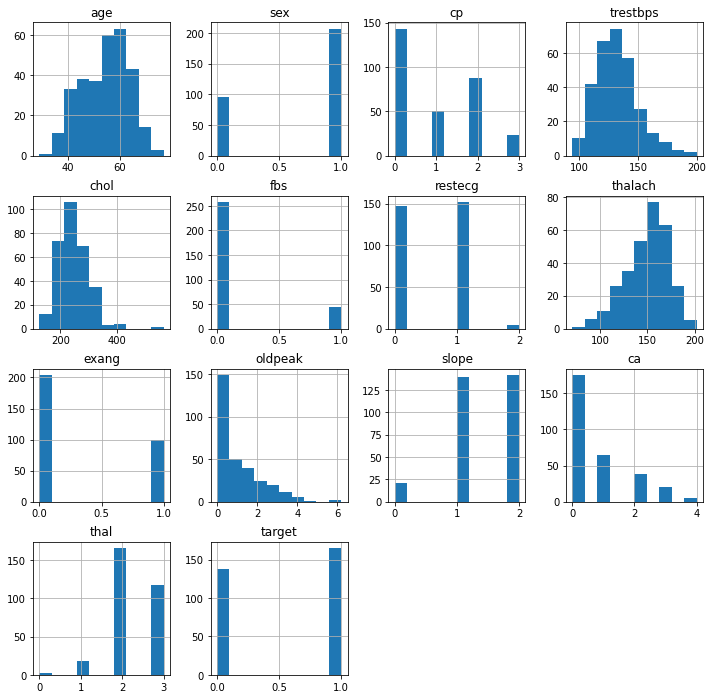

In [8]:
#plot histograms for each column

dataset.hist(figsize=(12,12))
plt.show()

**Now we need to convert some categorical variables into dummy variables**

In [9]:
dataset2 = pd.get_dummies(dataset , columns=['sex' , 'cp' , 'fbs' , 'restecg' , 'exang' , 'slope' , 'ca' , 'thal'])

In [10]:
dataset2.head()

age  trestbps  chol  thalach  oldpeak  ...  ca_4  thal_0  thal_1  thal_2  thal_3
0   63       145   233      150      2.3  ...     0       0       1       0       0
1   37       130   250      187      3.5  ...     0       0       0       1       0
2   41       130   204      172      1.4  ...     0       0       0       1       0
3   56       120   236      178      0.8  ...     0       0       0       1       0
4   57       120   354      163      0.6  ...     0       0       0       1       0

[5 rows x 31 columns]

In [11]:
cols = ['cp_0','cp_1','cp_2','cp_3', 'trestbps', 'chol', 'fbs_0','fbs_1', 'restecg_0','restecg_1','restecg_2', 'thalach', 'exang_0','exang_1']    

In [12]:
X = dataset2[cols]
y = dataset2.target

In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state = 42)

In [15]:
x_train.shape

(227, 14)

In [16]:
x_test.shape

(76, 14)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
x_train

array([[-0.91139737,  2.34216018, -0.6815542 , ...,  0.63335882,
         0.6815542 , -0.6815542 ],
       [-0.91139737, -0.42695628,  1.46723474, ..., -0.69663611,
         0.6815542 , -0.6815542 ],
       [ 1.09721625, -0.42695628, -0.6815542 , ...,  0.58902565,
         0.6815542 , -0.6815542 ],
       ...,
       [-0.91139737, -0.42695628, -0.6815542 , ..., -0.8296356 ,
         0.6815542 , -0.6815542 ],
       [ 1.09721625, -0.42695628, -0.6815542 , ..., -0.25330447,
         0.6815542 , -0.6815542 ],
       [-0.91139737,  2.34216018, -0.6815542 , ...,  1.29835628,
         0.6815542 , -0.6815542 ]])

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
y_pred = classifier.predict(x_test)

In [21]:
x_test

array([[ 1.09721625, -0.42695628, -0.6815542 , ..., -1.67196572,
        -1.46723474,  1.46723474],
       [-0.91139737, -0.42695628, -0.6815542 , ...,  0.41169299,
         0.6815542 , -0.6815542 ],
       [-0.91139737, -0.42695628,  1.46723474, ...,  1.03235729,
         0.6815542 , -0.6815542 ],
       ...,
       [ 1.09721625, -0.42695628, -0.6815542 , ...,  1.60868842,
         0.6815542 , -0.6815542 ],
       [ 1.09721625, -0.42695628, -0.6815542 , ..., -0.78530243,
         0.6815542 , -0.6815542 ],
       [-0.91139737,  2.34216018, -0.6815542 , ...,  0.23436034,
         0.6815542 , -0.6815542 ]])

In [22]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

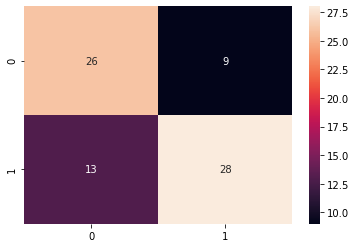

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.7105263157894737

In [25]:
import pickle
pickle.dump(classifier , open('model.pkl' , 'wb'))
pickle.dump(sc , open('sc.pkl','wb'))